# Example data processing using the pandas API
  

**[Big Data and Cloud Computing](https://www.dcc.fc.up.pt/~edrdo/aulas/bdcc), Eduardo R. B. Marques, DCC/FCUP**

To illustrate some simple data processing in Colab,we will make use of the popular [pandas](https://pandas.pydata.org/) library, in particular the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) API.


  


In [1]:
# Load the Pandas libraries with alias 'pd'
import pandas as pd

## References

- [Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), chapter 3 of the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) (freely available online) by [Jake VanderPlas](http://vanderplas.com/).
- Official documentation
 - [Getting started](https://pandas.pydata.org/docs/getting_started/) guide:
   - [10 minutes to pandas](https://pandas.pydata.org/docs/getting_started/10min.html)
   - [Introduction to DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe)
  - [Complete API Reference](https://pandas.pydata.org/docs/reference/index.html), including the features we make use of here:
    - [DataFrame API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
    - [Input/Ouput](https://pandas.pydata.org/docs/reference/io.html)


## The MovieLens data set

We will use a small [MovieLens](https://grouplens.org/datasets/movielens/) data set from the [GroupLens project](https://grouplens.org/). 

The following commands will fetch the
data set and store it into the filesystem the Colab runtime.

In [2]:
!curl https://files.grouplens.org/datasets/movielens/ml-latest-small.zip -o ml-latest-small.zip
!unzip -o ml-latest-small.zip 
!rm ml-latest-small.zip 
!ls ml-latest-small

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   489k      0  0:00:01  0:00:01 --:--:--  489k
Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  
links.csv  movies.csv  ratings.csv  README.txt	tags.csv


### A brief look at the data

In [3]:
dataset_path = "ml-latest-small/"

#### Movies

In [4]:
# Load movie data frame from the CSV file
movies = pd.read_csv(dataset_path + "movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### Tags

In [5]:
tags = pd.read_csv(dataset_path + "tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Ratings

In [6]:
ratings = pd.read_csv(dataset_path + "ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Some data processing examples

#### Simple filtering

What movie has id 1234 ? 

In [7]:
m1234 = movies[movies.movieId == 1234]
m1234

,movieId,title,genres
934,1234,"Sting, The (1973)",Comedy|Crime


What movie has "Star Wars" in the title?

In [8]:
star_wars_movies = movies[movies.title.str.contains("Star Wars")]
star_wars_movies

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1979,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
3832,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
5896,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
6823,61160,Star Wars: The Clone Wars (2008),Action|Adventure|Animation|Sci-Fi
7367,79006,Empire of Dreams: The Story of the 'Star Wars'...,Documentary
8683,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX
8908,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi


### Global rating rata


Let's now calculate a few stats 

In [9]:
ratings[["rating"]].agg(["min", "max", "mean"])

,rating
min,0.500000
max,5.000000
mean,3.501557


Let us plot the global rating distribution using a [Seaborn](https://seaborn.pydata.org/) plot.

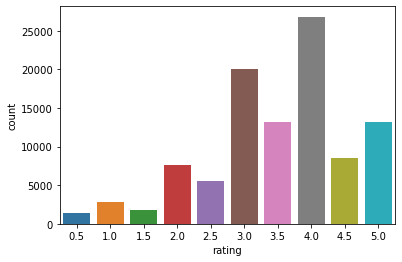

In [10]:
import seaborn as sb

axes = sb.countplot(data=ratings, x="rating")

Let us  derive the same numbers that are shown in the plot ourselves.

In [11]:
counts = (
    ratings.groupby("rating")
    .rating.agg(["count"])
    .sort_values(by="rating", ascending=False)
)
counts

,count
rating,
5.0,13211
4.5,8551
4.0,26818
3.5,13136
3.0,20047
2.5,5550
2.0,7551
1.5,1791
1.0,2811


### Order movies by average rating

First derive the average ratings.

In [12]:
avg_ratings_by_movie = ratings.groupby("movieId").rating.agg(["count", "mean"])
avg_ratings_by_movie

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


The information is more human-readable if we join in the movie information and sort the data by average rating and movie title.

In [13]:
join_data = avg_ratings_by_movie.join(movies.set_index("movieId"))
sorted_data = join_data.sort_values(by=["mean", "title"], ascending=[False, True])
sorted_data

,count,mean,title,genres
movieId,,,,
27751,1,5.0,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller
77846,1,5.0,12 Angry Men (1997),Crime|Drama
141816,1,5.0,12 Chairs (1976),Adventure|Comedy
5468,1,5.0,20 Million Miles to Earth (1957),Sci-Fi
27373,1,5.0,61* (2001),Drama
...,...,...,...,...
8137,1,0.5,"Wasp Woman, The (1959)",Horror|Sci-Fi
8236,1,0.5,While the City Sleeps (1956),Drama|Film-Noir
157172,1,0.5,Wizards of the Lost Kingdom II (1989),Action|Fantasy


Suppose we now want to filter out films with less than 5 ratings and show the top 20 of those movies.

In [14]:
sorted_data.query("count >= 5").head(20)

,count,mean,title,genres
movieId,,,,
6460,5,4.900000,"Trial, The (Procès, Le) (1962)",Drama
177593,8,4.750000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
31364,5,4.700000,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
2239,6,4.666667,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
4334,5,4.600000,Yi Yi (2000),Drama
1041,11,4.590909,Secrets & Lies (1996),Drama
106642,7,4.571429,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi
3451,11,4.545455,Guess Who's Coming to Dinner (1967),Drama
1178,12,4.541667,Paths of Glory (1957),Drama|War


## Exercises



1.   Analyse  the `tags` data frame. What are the  10 most used tags?
2.   For the most used tag identify the movies that have been tagged with it. Display the movie title information.
3.   What are the 10 movies that have been tagged more often? 
4.    At the other extreme, are there movies with no tags?




In [15]:
# What are the  10 most used tags?
tags.groupby("tag").tag.agg(["count"]).sort_values(by="count", ascending=False).head(10)

,count
tag,
In Netflix queue,131
atmospheric,36
thought-provoking,24
superhero,24
Disney,23
surreal,23
funny,23
religion,22
dark comedy,21


In [16]:
# What are the  10 most used tags?
tags["tag"].value_counts().head(10)

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64

In [17]:
# For the most used tag identify the movies that have been tagged with it.
# Display the movie title information.
most_used_tag = tags["tag"].value_counts().idxmax()
movie_tag_joined = (tags[tags["tag"] == most_used_tag]).join(
    movies.set_index("movieId")
)
movie_tag_joined[["movieId", "title", "tag"]].dropna()

,movieId,title,tag
996,28,Last Man Standing (1996),In Netflix queue
1009,40,Escape to Witch Mountain (1975),In Netflix queue
1037,162,"Lawnmower Man, The (1992)",In Netflix queue
1047,232,"Long Kiss Goodnight, The (1996)",In Netflix queue
1082,326,"Candidate, The (1972)",In Netflix queue
...,...,...,...
2463,36535,Ruthless People (1986),In Netflix queue
2471,38061,Crocodile Dundee II (1988),In Netflix queue
2474,39234,"Color of Money, The (1986)",In Netflix queue
2475,39292,52 Pick-Up (1986),In Netflix queue


In [18]:
# What are the 10 movies that have been tagged more often?
tags_by_movie = (
    tags.groupby("movieId")
    .tag.agg(["count"])
    .sort_values(by="count", ascending=False)
    .head(10)
)
joined_data = tags_by_movie.join(movies.set_index("movieId")["title"])
joined_data

,count,title
movieId,,
296,181,Pulp Fiction (1994)
2959,54,Fight Club (1999)
924,41,2001: A Space Odyssey (1968)
293,35,Léon: The Professional (a.k.a. The Professiona...
7361,34,Eternal Sunshine of the Spotless Mind (2004)
1732,32,"Big Lebowski, The (1998)"
4878,29,Donnie Darko (2001)
79132,26,Inception (2010)
260,26,Star Wars: Episode IV - A New Hope (1977)


In [19]:
# At the other extreme, are there movies with no tags? R.: No
joined_data[joined_data["count"] == 0]

,count,title
movieId,,
